In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_excel(os.path.join('../PRE_PROCESS_DATA/statut_usage_log_2000.xlsx'))
df.fillna(method='ffill', inplace=True)

<IPython.core.display.Javascript object>


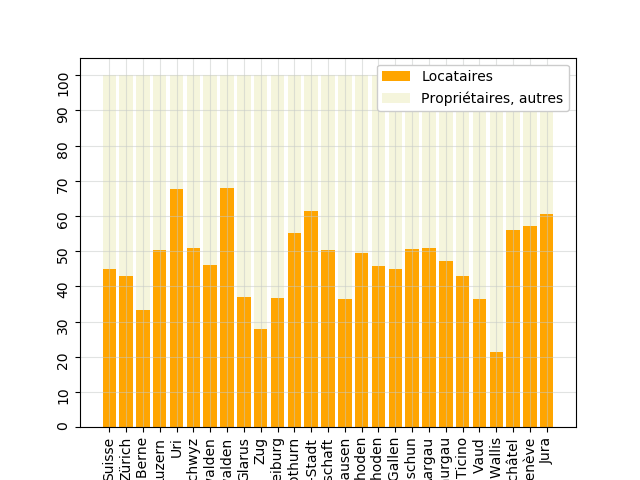

In [110]:
%matplotlib notebook
plt.figure('Répartiton des locataires par Canton')

plt.bar(range(27), 100*df[df['Type d\'usage']=='Locataire'].groupby(['Zone geographique'])['Nombre'].sum()/df.groupby(['Zone geographique'])['Nombre'].sum(), label = 'Locataires', color='orange')
plt.bar(range(27), 100*df[df['Type d\'usage']!='Locataire'].groupby(['Zone geographique'])['Nombre'].sum()/df.groupby(['Zone geographique'])['Nombre'].sum(), bottom=100*df[df['Type d\'usage']=='Locataire'].groupby(['Zone geographique'])['Nombre'].sum()/df.groupby(['Zone geographique'])['Nombre'].sum(), label='Propriétaires, autres', color='beige')

plt.xticks(range(27), list(df['Zone geographique'].unique()), rotation=90)
plt.yticks(range(0, 101, 10), rotation=90)
plt.legend(framealpha=1)
plt.grid(color='xkcd:silver', alpha=0.5)



In [17]:
dff = pd.read_excel(os.path.join('../PRE_PROCESS_DATA/type_propr_2000.xlsx'))
dff.fillna(method='ffill', inplace=True)

In [18]:
dff

,Zone geographique,Type proprietaire,Nombre
0,Suisse,Particulier(s),2617011
1,Suisse,Société immobilière,132024
2,Suisse,Société coopérative de construction et d'habit...,119779
3,Suisse,Autre société coopérative de construction et d...,42166
4,Suisse,Assurance,118584
5,Suisse,Fonds de placement immobilier,58306
6,Suisse,Institution de prévoyance professionnelle,181743
7,Suisse,Autre fondation,44365
8,Suisse,Association,15141
9,Suisse,Commune/Canton/la Confédération,84088


<IPython.core.display.Javascript object>


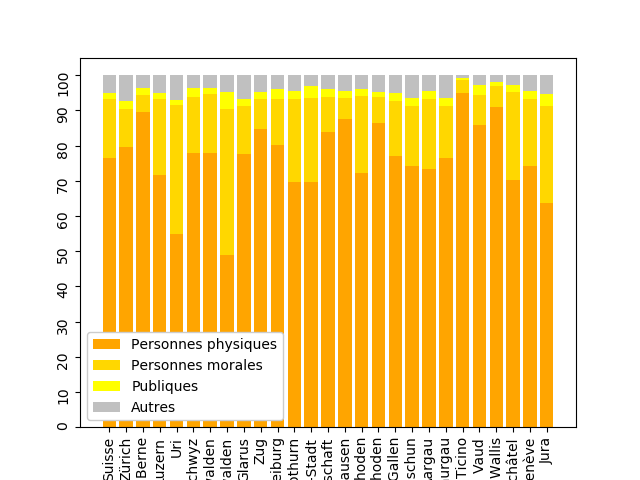

In [120]:
%matplotlib notebook
plt.figure('Répartiton par type de propriétaires par Canton')

bottom1 = 100*dff[dff['Type proprietaire']=='Particulier(s)'].groupby(['Zone geographique'])['Nombre'].sum()/dff.groupby(['Zone geographique'])['Nombre'].sum()
bottom2 = bottom1 + 100*dff[(dff['Type proprietaire']!='Autre genre de propriétaire')&(dff['Type proprietaire']!='Commune/Canton/la Confédération')&(dff['Type proprietaire']!='Particulier(s)')].groupby(['Zone geographique'])['Nombre'].sum()/dff.groupby(['Zone geographique'])['Nombre'].sum()
bottom3 = bottom2 + 100*dff[dff['Type proprietaire']=='Commune/Canton/la Confédération'].groupby(['Zone geographique'])['Nombre'].sum()/dff.groupby(['Zone geographique'])['Nombre'].sum()

plt.bar(range(27), 100*dff[dff['Type proprietaire']=='Particulier(s)'].groupby(['Zone geographique'])['Nombre'].sum()/dff.groupby(['Zone geographique'])['Nombre'].sum(), label = 'Personnes physiques', color='orange')
plt.bar(range(27), 100*dff[(dff['Type proprietaire']!='Autre genre de propriétaire')&(dff['Type proprietaire']!='Commune/Canton/la Confédération')&(dff['Type proprietaire']!='Particulier(s)')].groupby(['Zone geographique'])['Nombre'].sum()/dff.groupby(['Zone geographique'])['Nombre'].sum(), bottom= bottom1, label = 'Personnes morales', color='gold')

plt.bar(range(27), 100*dff[dff['Type proprietaire']=='Commune/Canton/la Confédération'].groupby(['Zone geographique'])['Nombre'].sum()/dff.groupby(['Zone geographique'])['Nombre'].sum(), bottom= bottom2, label = 'Publiques', color='yellow')
plt.bar(range(27), 100*dff[dff['Type proprietaire']=='Autre genre de propriétaire'].groupby(['Zone geographique'])['Nombre'].sum()/dff.groupby(['Zone geographique'])['Nombre'].sum(), bottom = bottom3, label = 'Autres', color='silver')

plt.xticks(range(27), list(df['Zone geographique'].unique()), rotation=90)
plt.yticks(range(0, 101, 10), rotation=90)
plt.legend(framealpha=1)

In [95]:
100*dff[dff['Type proprietaire']=='Particulier(s)'].groupby(['Zone geographique'])['Nombre'].sum()/dff.groupby(['Zone geographique'])['Nombre'].sum()

Zone geographique
Aargau                              76.536078
Appenzell Ausserrhoden              79.611379
Appenzell Innerrhoden               89.629143
Basel-Landschaft                    71.682631
Basel-Stadt                         54.991670
Bern / Berne                        78.021780
Fribourg / Freiburg                 77.766299
Genève                              48.809419
Glarus                              77.751671
Graubünden / Grigioni / Grischun    84.638762
Jura                                80.106955
Luzern                              69.792460
Neuchâtel                           69.786755
Nidwalden                           83.736861
Obwalden                            87.666459
Schaffhausen                        72.084997
Schwyz                              86.416164
Solothurn                           77.137809
St. Gallen                          74.237757
Suisse                              73.322451
Thurgau                             76.526428
Ticino          